In [1]:
# SIMPLE CNN EXERCISE

In [2]:
from keras import datasets, layers, Sequential
import tensorflow as tf
import random
from matplotlib import pyplot as plt
import warnings
import random
import numpy as np
import seaborn as sn

In [3]:
warnings.filterwarnings('ignore')

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
def showImg(index):
    plt.axis('off')
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(X_train[index])
    plt.title(y_train[index])

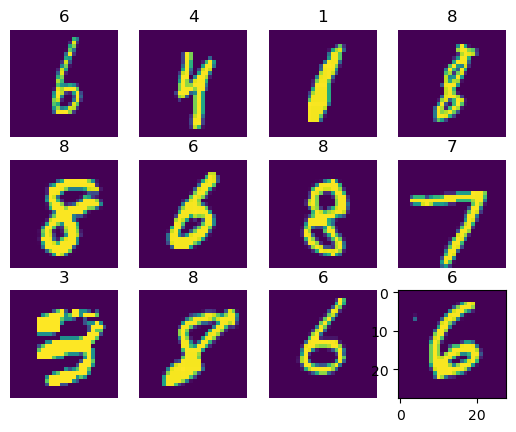

In [22]:
for i in range(12):
    showImg(random.randint(0, 50000))

In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train.shape

(60000, 28, 28, 1)

# SIMPLE ARTIFICIAL NEURAL NETWORK

In [12]:
ann = Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10)



Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.3373 - accuracy: 0.8991
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1655 - accuracy: 0.9502
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1301 - accuracy: 0.9599
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1097 - accuracy: 0.9656
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0979 - accuracy: 0.9696
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9724
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9735
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9765
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0700 - accuracy: 0.9769
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0

In [13]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0746 - accuracy: 0.9775


[0.07460557669401169, 0.9775000214576721]

# SIMPLE CONVOLUTIONAL NEURAL NETWORK

In [14]:
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((3,3)),
    
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2383 - accuracy: 0.9335
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0947 - accuracy: 0.9721
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0731 - accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0620 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0540 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0475 - accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9884
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0353 - accuracy: 0.9895
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [15]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0534 - accuracy: 0.9834


[0.053381431847810745, 0.9833999872207642]

In [16]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
def predict(index):
    print("Y PREDICTION = ", np.argmax(y_pred[index]))
    print("Y TRUE = ", y_test[index])
    print()

In [18]:
for i in range(5):
    predict(random.randint(0, 10))

Y PREDICTION =  2
Y TRUE =  2

Y PREDICTION =  7
Y TRUE =  7

Y PREDICTION =  7
Y TRUE =  7

Y PREDICTION =  7
Y TRUE =  7

Y PREDICTION =  1
Y TRUE =  1



In [24]:
y_pred = [np.argmax(val) for val in y_pred]

In [20]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    6,    0,    0,    1,    6,    2,    1,    1],
       [   0, 1131,    2,    0,    0,    0,    0,    2,    0,    0],
       [   1,    3, 1023,    0,    1,    0,    0,    4,    0,    0],
       [   0,    0,    4,  994,    0,    7,    1,    2,    2,    0],
       [   0,    0,    0,    0,  969,    0,    3,    0,    1,    9],
       [   0,    0,    1,    5,    0,  883,    3,    0,    0,    0],
       [   2,    2,    1,    0,    1,    1,  951,    0,    0,    0],
       [   0,    1,    7,    2,    0,    0,    0, 1015,    1,    2],
       [   6,    1,    9,    2,    3,    5,    6,    9,  925,    8],
       [   1,    3,    1,    3,    9,    2,    0,    8,    2,  980]])>

Text(50.722222222222214, 0.5, 'Truth')

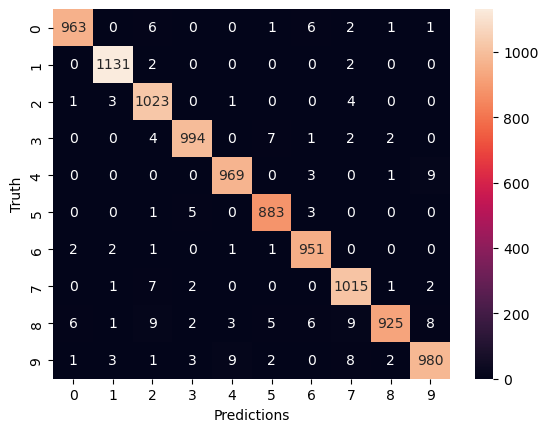

In [21]:
sn.heatmap(cm, annot=True, fmt='')
plt.xlabel("Predictions")
plt.ylabel("Truth")